In [46]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Deep Dive Into Data

In [47]:
# Read in train data
train = pd.read_csv('train-costarica.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [48]:
train.shape

(9557, 143)

In [49]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

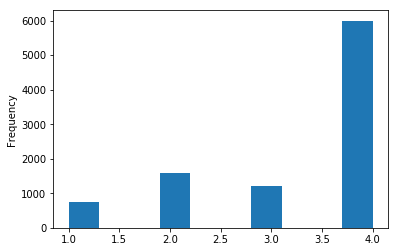

In [50]:
train['Target'].astype(int).plot.hist();

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [52]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [53]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(10)

Your selected dataframe has 143 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
rez_esc,7928,83.0
v18q1,7342,76.8
v2a1,6860,71.8
meaneduc,5,0.1
SQBmeaned,5,0.1


In [54]:
# Number of each type of column
train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [55]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [56]:
# Read in test data
test = pd.read_csv('test-costarica.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [57]:
test.shape

(23856, 142)

In [58]:
# Missing values statistics
missing_values_test = missing_values_table(test)
missing_values_test.head(10)

Your selected dataframe has 142 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
rez_esc,19653,82.4
v18q1,18126,76.0
v2a1,17403,73.0
meaneduc,31,0.1
SQBmeaned,31,0.1


#### Object Columns

The last column type is object which we can view as follows.

In [59]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and idhogar object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we'll need to address before doing any machine learning. According to the documentation for these columns:

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
These explanations clear up the issue. For these three variables, "yes" = 1 and "no" = 0. We can correct the variables using a mapping and convert to floats.

In [60]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [61]:
# Create correlation matrix
corr_matrix=train.corr()
# Select upper triangle of correlation matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop=[column for column in upper.columns if any(abs(upper[column])>0.95)]

In [62]:
to_drop

['tamhog',
 'hhsize',
 'coopele',
 'female',
 'hogar_total',
 'area2',
 'SQBage',
 'SQBhogar_total',
 'agesq']

In [64]:
corr_matrix['Target']


v2a1               0.273559
hacdor            -0.191714
rooms              0.226208
hacapo            -0.138008
v14a               0.063382
refrig             0.126792
v18q               0.238864
v18q1             -0.007334
r4h1              -0.229889
r4h2               0.101253
r4h3              -0.043359
r4m1              -0.253163
r4m2              -0.036959
r4m3              -0.173931
r4t1              -0.316745
r4t2               0.048904
r4t3              -0.147548
tamhog            -0.147642
tamviv            -0.158224
escolari           0.302305
rez_esc           -0.099357
hhsize            -0.147642
paredblolad        0.261274
paredzocalo       -0.079199
paredpreb         -0.099002
pareddes          -0.082923
paredmad          -0.168237
paredzinc         -0.051806
paredfibras       -0.027730
paredother        -0.000629
                     ...   
bedrooms           0.166943
overcrowding      -0.289110
tipovivi1         -0.007435
tipovivi2          0.143891
tipovivi3          0

In [44]:
train['inst'] = np.argmax(np.array(train[[c for c in train if c.startswith('instl')]]), axis = 1)
train['inst'].describe()

count    9557.000000
mean        2.877577
std         2.244121
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: inst, dtype: float64

In [66]:
train['lugar'] = np.argmax(np.array(train[[c for c in train if c.startswith('lugar')]]), axis = 1)
train['lugar'].describe()

count    9557.000000
mean        4.644344
std         2.290674
min         0.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: lugar, dtype: float64

In [68]:
train.groupby('lugar')['Target'].value_counts(normalize = True)

lugar  Target
0      4         0.521856
       2         0.215871
       3         0.152656
       1         0.109617
1      4         0.459144
       2         0.295720
       3         0.124514
       1         0.120623
2      4         0.347826
       2         0.270531
       3         0.202899
       1         0.178744
3      4         0.408497
       2         0.251634
       1         0.183007
       3         0.156863
4      4         0.335294
       2         0.317647
       3         0.176471
       1         0.170588
5      4         0.405573
       2         0.281734
       3         0.160991
       1         0.151703
6      4         0.702124
       2         0.130782
       3         0.112702
       1         0.054392
Name: Target, dtype: float64

In [69]:
train['area'] = np.argmax(np.array(train[['area1', 'area2']]), axis = 1)
train.groupby('area')['Target'].value_counts(normalize = True)

area  Target
0     4         0.658369
      2         0.154049
      3         0.114365
      1         0.073217
1     4         0.549853
      2         0.199780
      3         0.156891
      1         0.093475
Name: Target, dtype: float64

In [70]:
train.groupby('area')['Target'].value_counts(normalize = False)

area  Target
0     4         4496
      2         1052
      3          781
      1          500
1     4         1500
      2          545
      3          428
      1          255
Name: Target, dtype: int64

In [71]:
np.all(train['r4h3'] == (train['r4h2'] + train['r4h1']))

True

In [72]:
np.all(train['r4m3'] == (train['r4m2'] + train['r4m1']))

True

In [73]:
np.all(train['r4t3'] == (train['r4t2'] + train['r4t1']))

True